In [1]:
import tensorflow as tf
import jieba
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
data = open('/Users/hkmac/Desktop/poetry.txt').read()

In [3]:
data[:600]

'寒随穷律变，春逐鸟声开。初风飘带柳，晚雪间花梅。碧林青旧竹，绿沼翠新苔。芝田初雁去，绮树巧莺来。\n晚霞聊自怡，初晴弥可喜。日晃百花色，风动千林翠。池鱼跃不同，园鸟声还异。寄言博通者，知予物外志。\n一朝春夏改，隔夜鸟花迁。阴阳深浅叶，晓夕重轻烟。哢莺犹响殿，横丝正网天。珮高兰影接，绶细草纹连。碧鳞惊棹侧，玄燕舞檐前。何必汾阳处，始复有山泉。\n夏律昨留灰，秋箭今移晷。峨嵋岫初出，洞庭波渐起。桂白发幽岩，菊黄开灞涘。运流方可叹，含毫属微理。\n寒惊蓟门叶，秋发小山枝。松阴背日转，竹影避风移。提壶菊花岸，高兴芙蓉池。欲知凉气早，巢空燕不窥。\n爽气浮丹阙，秋光澹紫宫。衣碎荷疏影，花明菊点丛。袍轻低草露，盖侧舞松风。散岫飘云叶，迷路飞烟鸿。砌冷兰凋佩，闺寒树陨桐。别鹤栖琴里，离猿啼峡中。落野飞星箭，弦虚半月弓。芳菲夕雾起，暮色满房栊。\n山亭秋色满，岩牖凉风度。疏兰尚染烟，残菊犹承露。古石衣新苔，新巢封古树。历览情无极，咫尺轮光暮。\n秦川雄帝宅，函谷壮皇居。绮殿千寻起，离宫百雉余。连薨遥接汉，飞观迥凌虚。云日隐层阙，风烟出绮疏。岩廊罢机务，崇文聊驻辇。玉匣启龙图，金绳披凤篆。韦编断仍续，缥帙舒还卷。对此乃淹留，欹案观坟典。移步出词林，停舆欣武宴。雕弓写明月，骏马疑流电。惊雁落虚弦，啼猿悲急箭。阅赏诚多美，于兹乃忘倦。鸣笳临乐馆，眺听欢芳节。急管韵朱弦，清歌凝白雪。彩凤肃来仪，玄鹤纷成列。去兹郑卫声'

In [4]:
data = " ".join(jieba.cut(data))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/v4/j5ng6d4d2zd2n0t825276yxm0000gn/T/jieba.cache
Loading model cost 0.667 seconds.
Prefix dict has been built succesfully.


In [5]:
data[:1000]

'寒随 穷律变 ， 春逐 鸟声 开 。 初风 飘带 柳 ， 晚雪间 花梅 。 碧林 青旧 竹 ， 绿 沼翠新 苔 。 芝田 初雁去 ， 绮 树巧莺来 。 \n 晚霞 聊自怡 ， 初晴 弥 可喜 。 日晃 百花 色 ， 风动 千林翠 。 池 鱼跃 不同 ， 园 鸟声 还异 。 寄言博 通者 ， 知予 物外志 。 \n 一朝 春夏 改 ， 隔夜 鸟花迁 。 阴阳 深浅 叶 ， 晓夕 重轻烟 。 哢 莺 犹响 殿 ， 横丝正 网天 。 珮 高兰 影接 ， 绶 细草纹 连 。 碧 鳞 惊 棹 侧 ， 玄燕舞 檐前 。 何必 汾阳 处 ， 始复 有 山泉 。 \n 夏律 昨留 灰 ， 秋箭 今移 晷 。 峨嵋 岫 初出 ， 洞庭 波渐 起 。 桂 白发 幽岩 ， 菊黄 开 灞 涘 。 运流 方可 叹 ， 含毫 属 微理 。 \n 寒惊 蓟门 叶 ， 秋发 小山 枝 。 松阴 背日 转 ， 竹影 避风 移 。 提壶 菊花 岸 ， 高兴 芙蓉 池 。 欲知 凉气 早 ， 巢空燕 不 窥 。 \n 爽气 浮丹 阙 ， 秋光 澹 紫宫 。 衣碎 荷 疏影 ， 花明菊点 丛 。 袍 轻低 草露 ， 盖侧 舞松风 。 散 岫 飘云叶 ， 迷路 飞烟 鸿 。 砌 冷兰 凋佩 ， 闺寒树 陨桐 。 别鹤栖琴 里 ， 离 猿啼 峡中 。 落野 飞星 箭 ， 弦 虚 半月 弓 。 芳菲 夕雾 起 ， 暮色 满房 栊 。 \n 山亭 秋色 满 ， 岩牖 凉风 度 。 疏兰 尚染烟 ， 残菊 犹承露 。 古石衣 新 苔 ， 新巢 封 古树 。 历览 情 无极 ， 咫尺 轮光 暮 。 \n 秦川 雄帝 宅 ， 函谷壮 皇居 。 绮 殿 千寻起 ， 离宫 百雉 余 。 连 薨 遥 接汉 ， 飞观 迥凌虚 。 云日 隐层 阙 ， 风烟 出 绮 疏 。 岩廊 罢 机务 ， 崇文 聊 驻 辇 。 玉匣 启龙图 ， 金绳 披凤 篆 。 韦编断 仍续 ， 缥帙舒 还 卷 。 对此 乃 淹留 ， 欹 案观 坟典 。 移步 出 词林 ， 停 舆欣 武宴 。 雕弓 写明 月 ， 骏马 疑 流电 。 惊雁落 虚 弦 ， 啼猿 悲急 箭 。 阅赏 诚多美 ， 于兹 乃 忘倦 。 鸣笳 临乐馆 ， 眺听 欢芳节 。 急管韵 朱弦 ， 清歌 凝 白雪 。 彩凤肃 来仪 ， 玄鹤纷 成列 。 去兹 郑卫声 ， 雅音 方可 悦 。

In [6]:
wordcloud = WordCloud(max_font_size=50, max_words=100,
                   background_color="white", 
                   font_path="/Users/hkmac/Desktop/simsun.ttf").generate(data)

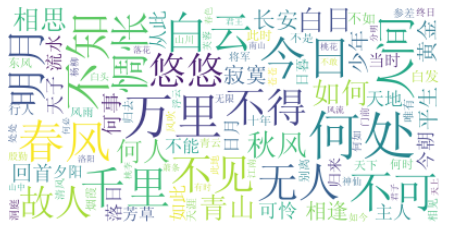

In [7]:
plt.rcParams['savefig.dpi'] = 300
plt.figure(figsize = (8,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("poemcloud.png")
plt.show()

In [8]:
corpus = data.split("\n")
corpus[:5]

['寒随 穷律变 ， 春逐 鸟声 开 。 初风 飘带 柳 ， 晚雪间 花梅 。 碧林 青旧 竹 ， 绿 沼翠新 苔 。 芝田 初雁去 ， 绮 树巧莺来 。 ',
 ' 晚霞 聊自怡 ， 初晴 弥 可喜 。 日晃 百花 色 ， 风动 千林翠 。 池 鱼跃 不同 ， 园 鸟声 还异 。 寄言博 通者 ， 知予 物外志 。 ',
 ' 一朝 春夏 改 ， 隔夜 鸟花迁 。 阴阳 深浅 叶 ， 晓夕 重轻烟 。 哢 莺 犹响 殿 ， 横丝正 网天 。 珮 高兰 影接 ， 绶 细草纹 连 。 碧 鳞 惊 棹 侧 ， 玄燕舞 檐前 。 何必 汾阳 处 ， 始复 有 山泉 。 ',
 ' 夏律 昨留 灰 ， 秋箭 今移 晷 。 峨嵋 岫 初出 ， 洞庭 波渐 起 。 桂 白发 幽岩 ， 菊黄 开 灞 涘 。 运流 方可 叹 ， 含毫 属 微理 。 ',
 ' 寒惊 蓟门 叶 ， 秋发 小山 枝 。 松阴 背日 转 ， 竹影 避风 移 。 提壶 菊花 岸 ， 高兴 芙蓉 池 。 欲知 凉气 早 ， 巢空燕 不 窥 。 ']

In [12]:
length = []
for line in corpus:
    length.append(len(line))

In [13]:
pd.Series(length).describe()

count    43031.000000
mean       116.884200
std        156.704648
min          0.000000
25%         61.000000
50%         81.000000
75%        109.000000
max       8154.000000
dtype: float64

In [14]:
corpus_new = []
for i in corpus:
    if '_' in i or '(' in i or '（' in i or '《' in i or '[' in i:
        continue
    if len(i) < 61 or len(i) > 150:
        continue
    else:
        corpus_new.append(i)

In [15]:
length_new = []
for line in corpus_new:
    length_new.append(len(line))

In [17]:
pd.Series(length_new).describe()

count    24811.000000
mean        92.938737
std         16.718687
min         61.000000
25%         79.000000
50%         82.000000
75%        105.000000
max        150.000000
dtype: float64

In [18]:
# how many words to select
vocab_size = 5000
embedding_dim = 20
max_length = 150
trunc_type='post'

In [19]:
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(corpus_new)
total_words = len(tokenizer.word_index)

print(total_words)

168382


In [20]:
tokenizer.word_index

{'，': 1,
 '。': 2,
 '在': 3,
 '月': 4,
 '去': 5,
 '不': 6,
 '有': 7,
 '与': 8,
 '还': 9,
 '谁': 10,
 '是': 11,
 '人': 12,
 '无': 13,
 '上': 14,
 '为': 15,
 '更': 16,
 '将': 17,
 '来': 18,
 '归': 19,
 '日': 20,
 '中': 21,
 '欲': 22,
 '多': 23,
 '年': 24,
 '向': 25,
 '见': 26,
 '我': 27,
 '亦': 28,
 '时': 29,
 '得': 30,
 '已': 31,
 '尽': 32,
 '到': 33,
 '新': 34,
 '下': 35,
 '又': 36,
 '远': 37,
 '春': 38,
 '看': 39,
 '何处': 40,
 '却': 41,
 '道': 42,
 '和': 43,
 '从': 44,
 '好': 45,
 '未': 46,
 '一': 47,
 '深': 48,
 '老': 49,
 '后': 50,
 '路': 51,
 '愁': 52,
 '出': 53,
 '客': 54,
 '过': 55,
 '万里': 56,
 '处': 57,
 '如': 58,
 '酒': 59,
 '里': 60,
 '对': 61,
 '事': 62,
 '起': 63,
 '长': 64,
 '馀': 65,
 '曾': 66,
 '开': 67,
 '才': 68,
 '空': 69,
 '白云': 70,
 '坐': 71,
 '不知': 72,
 '听': 73,
 '清': 74,
 '心': 75,
 '回': 76,
 '皆': 77,
 '飞': 78,
 '地': 79,
 '雨': 80,
 '别': 81,
 '千里': 82,
 '今日': 83,
 '暮': 84,
 '同': 85,
 '自': 86,
 '秋': 87,
 '水': 88,
 '花': 89,
 '梦': 90,
 '风': 91,
 '云': 92,
 '难': 93,
 '醉': 94,
 '望': 95,
 '能': 96,
 '闲': 97,
 '问': 98,
 '满': 99,
 '应': 100,
 '

In [21]:
del tokenizer.word_index['，']
del tokenizer.word_index['。']

In [22]:
tokenizer.word_index

{'在': 3,
 '月': 4,
 '去': 5,
 '不': 6,
 '有': 7,
 '与': 8,
 '还': 9,
 '谁': 10,
 '是': 11,
 '人': 12,
 '无': 13,
 '上': 14,
 '为': 15,
 '更': 16,
 '将': 17,
 '来': 18,
 '归': 19,
 '日': 20,
 '中': 21,
 '欲': 22,
 '多': 23,
 '年': 24,
 '向': 25,
 '见': 26,
 '我': 27,
 '亦': 28,
 '时': 29,
 '得': 30,
 '已': 31,
 '尽': 32,
 '到': 33,
 '新': 34,
 '下': 35,
 '又': 36,
 '远': 37,
 '春': 38,
 '看': 39,
 '何处': 40,
 '却': 41,
 '道': 42,
 '和': 43,
 '从': 44,
 '好': 45,
 '未': 46,
 '一': 47,
 '深': 48,
 '老': 49,
 '后': 50,
 '路': 51,
 '愁': 52,
 '出': 53,
 '客': 54,
 '过': 55,
 '万里': 56,
 '处': 57,
 '如': 58,
 '酒': 59,
 '里': 60,
 '对': 61,
 '事': 62,
 '起': 63,
 '长': 64,
 '馀': 65,
 '曾': 66,
 '开': 67,
 '才': 68,
 '空': 69,
 '白云': 70,
 '坐': 71,
 '不知': 72,
 '听': 73,
 '清': 74,
 '心': 75,
 '回': 76,
 '皆': 77,
 '飞': 78,
 '地': 79,
 '雨': 80,
 '别': 81,
 '千里': 82,
 '今日': 83,
 '暮': 84,
 '同': 85,
 '自': 86,
 '秋': 87,
 '水': 88,
 '花': 89,
 '梦': 90,
 '风': 91,
 '云': 92,
 '难': 93,
 '醉': 94,
 '望': 95,
 '能': 96,
 '闲': 97,
 '问': 98,
 '满': 99,
 '应': 100,
 '春风': 101,
 '寒': 10

In [23]:
input_sequences = []
for line in corpus_new:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [24]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_length, padding='pre'))

In [25]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [26]:
xs[1].shape

(149,)

In [27]:
ys[1].shape

(168382,)

In [28]:
model = Sequential()
model.add(Embedding(total_words, embedding_dim, input_length=max_length-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 149, 20)           3367640   
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               205200    
_________________________________________________________________
dense (Dense)                (None, 168382)            50682982  
Total params: 54,255,822
Trainable params: 54,255,822
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=1, verbose=1)
#print model.summary()
print(model)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 344989 samples
 16064/344989 [>.............................] - ETA: 1:13:28 - loss: 9.4462 - accuracy: 0.0046

In [71]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

In [72]:
plot_graphs(history, 'accuracy')

NameError: name 'history' is not defined